### Intrinsic shape signatures(ISS)
In this tutorial we will show how to detect the **ISS** Keypoints of a 3D shape. The implementation is based on the keypoint detection modules proposed in Yu Zhong, "Intrinsic Shape Signatures: A Shape Descriptor for 3D Object Recognition", 2009.

#### ISS Keypoints
ISS saliency measure is based on the Eigenvalue Decomposition(EVD) of the scatter matrix $\sum (\mathbf{p})$ of the points belonging to the support of $p$, i.e.,
$$
\sum (\mathbf{p}) = \frac{1}{N}\sum_{\mathbf{q}\in \mathcal{N}(\mathbf{p})} (\mathbf{q} - \mu_{\mathbf{p}}) (\mathbf{q} - \mu_{\mathbf{p}})^T
$$
with $\mu_{\mathbf{p}} = \frac{1}{N} \sum_{\mathbf{q} \in \mathcal{N}(\mathbf{p})} \mathbf{q}$

Given $\sum (\mathbf{p}), its eigenvalues in decreasing magnitude order are denoted here as $\lambda_1$, $\lambda_2$, $\lambda_3$. During the pruning stage, points whose ratio between two successive eigenvalues is below a threshold are retained:
$$
\frac{\lambda_2 (\mathbf{p})}{\lambda_1 (\mathbf{p})} \lt \gamma_{12} \land \frac{\lambda_3(\mathbf{p})}{\lambda_2(\mathbf{p})} \lt \gamma_{23}
$$
The rationale is to avoid detecting keypoints at points exhibiting a similar spread along the principal directions, where a repeatable canonical reference frame cannot be established and, therefore, the subsequent description stage can hardly turn out effective. Among remaining points, the saliency is determined by the magnitude of the smallest eigenvalue
$$
\rho(\mathbf{p}) \doteq \lambda_3(\mathbf{p})
$$
So as to include only points with large variations along each principal direction.

After the detection step, a point will be considered a **keypoint** if it has the maximum saliency on a given neighborhood.

##### Note: 
For more details please refer to the original publication or to \"Performance Evaluation of 3D Keypoint Detectors", by Tombari et.al.

#### ISS Keypoint detection example

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import Open3D.examples.python.open3d_tutorial as o3dtut
import time

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


ISS Computation took: 633 [ms]


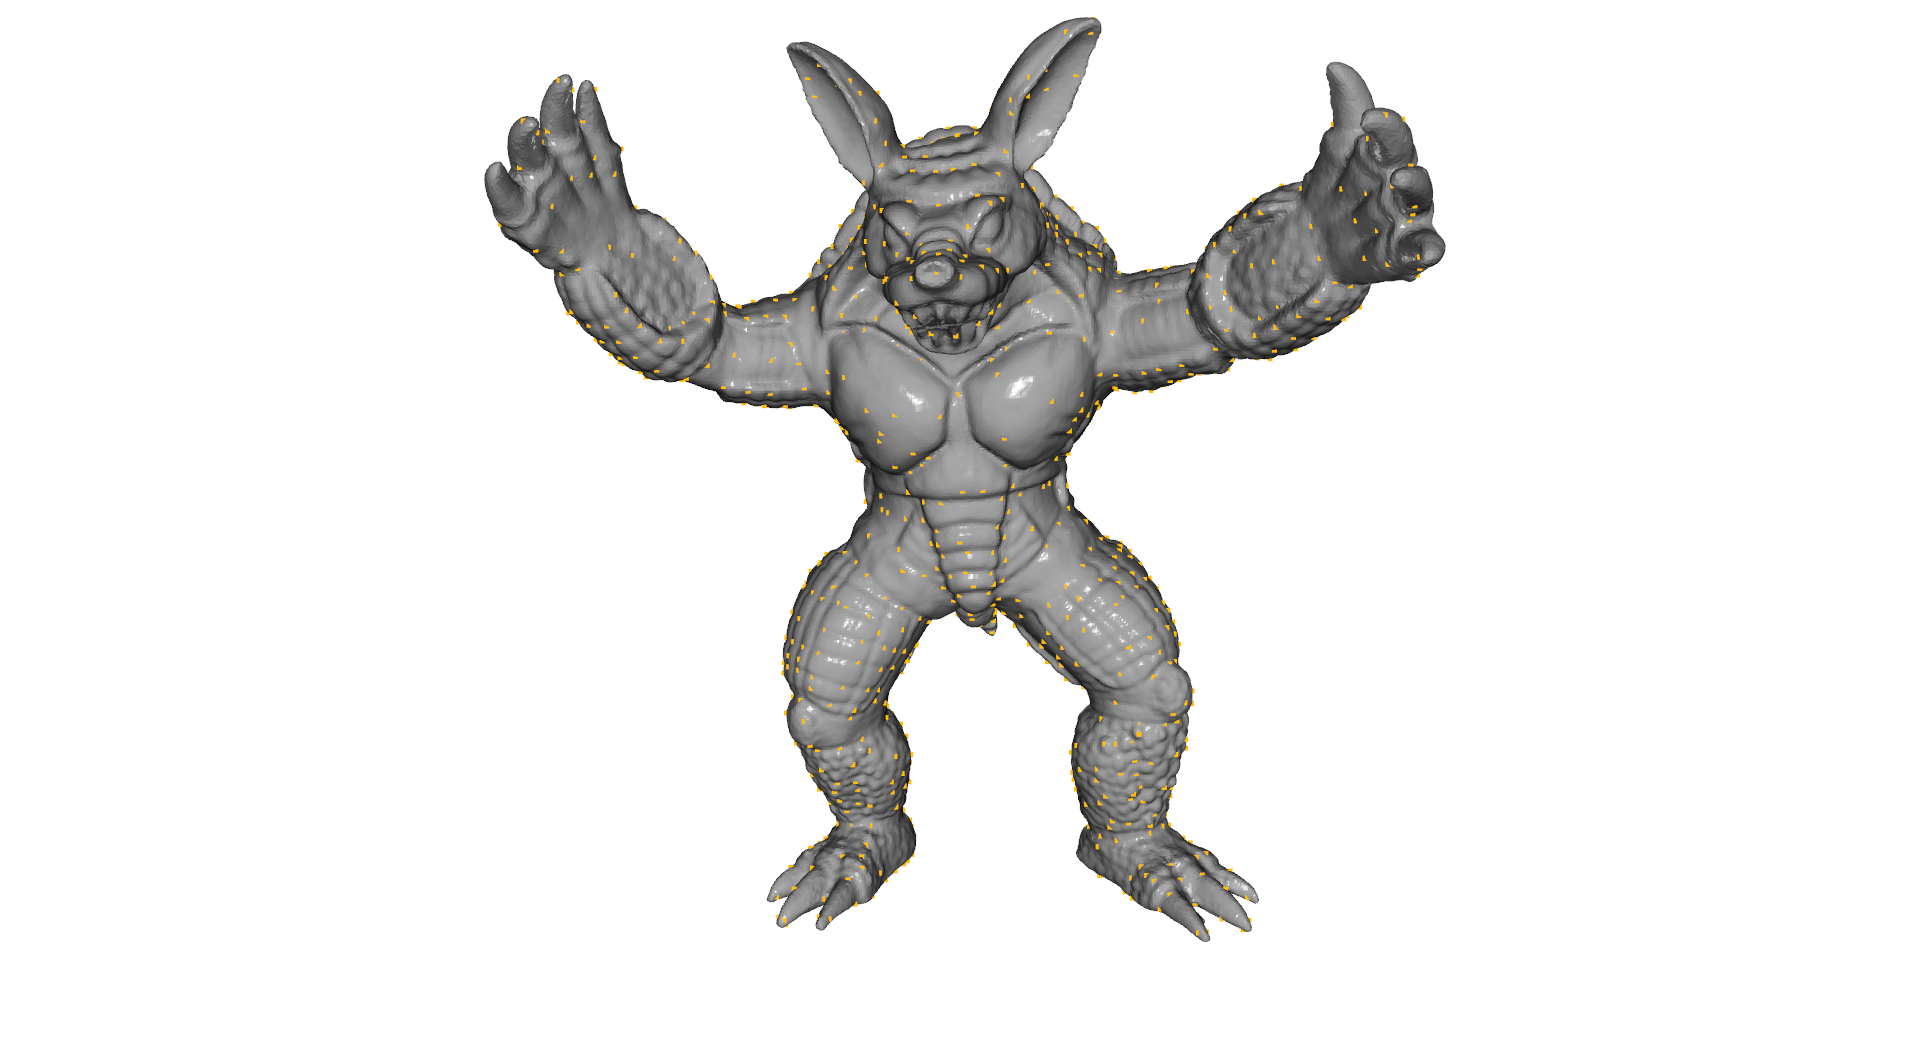

In [2]:
# Compute ISS Keypoints on Armadillo
mesh = o3dtut.get_armadillo_mesh()
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices

tic = time.time()
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd)
toc = 1000 * (time.time() - tic)
print(f'ISS Computation took: {toc:.0f} [ms]')

mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.5, 0.5, 0.5])
keypoints.paint_uniform_color([1.0, 0.75, 0.0])
o3d.visualization.draw_geometries([keypoints, mesh], front=[0, 0, -1.0])

In [3]:
# This function is only used to make the keypoints look better on the rendering
def keypoints_to_spheres(keypoints):
    spheres = o3d.geometry.TriangleMesh()
    for keypoint in keypoints.points:
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.001)
        sphere.translate(keypoint)
        spheres += sphere
    spheres.paint_uniform_color([1.0, 0.75, 0.0])
    return spheres

ISS Computation took 47 [ms]


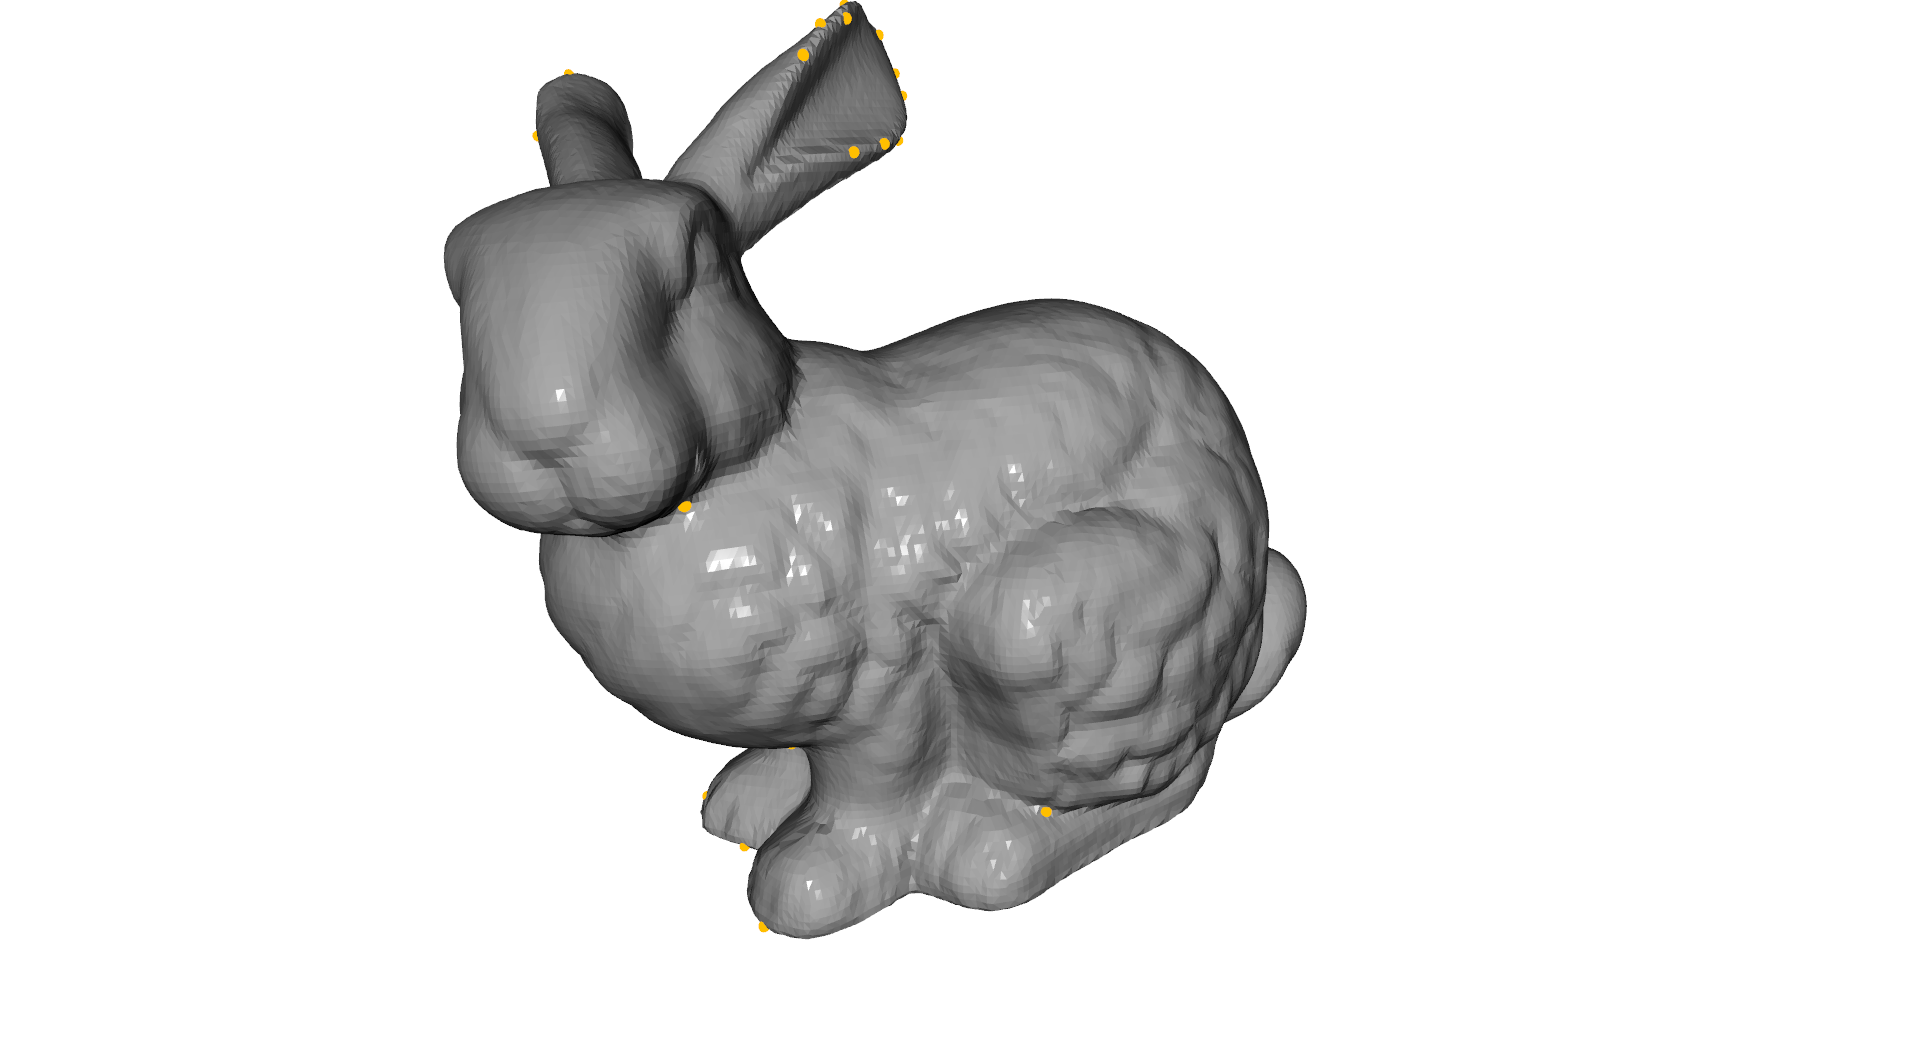

In [6]:
# Compute ISS Keypoints on Standford Bunny, changing the default parameters
mesh = o3dtut.get_bunny_mesh()
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices

tic = time.time()
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd, salient_radius=0.005,
    non_max_radius=0.005, gamma_21=0.5, gamma_32=0.5)
toc = 1000 * (time.time() - tic)
print(f'ISS Computation took {toc:.0f} [ms]')

mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.5, 0.5, 0.5])
o3d.visualization.draw_geometries([keypoints_to_spheres(keypoints), mesh])